# How's the Weather?

In [37]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from pprint import pprint
import citipy
import json
from citipy import citipy

lat_range = (-90, 90)
lng_range = (-180, 180)
api_key="aeb3cf034d1ddda25b0e5ee5f3be4847"

### Generate a Random List of Cities Around the World

In [13]:
base_url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
headers = {"Longitude": "lon", "Latitude": "lat", "Country": "country", "Wind Speed": "wind", "Highest Temp": "temp_max", "Pressure": "pressure", "Humidity": "humidity"}
city="london"
print(base_url + f'&q={city}')
#create a json output of the data
req = requests.get(base_url + f'&q={city}', headers=headers)
json_data = req.json()
print(json_data)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aeb3cf034d1ddda25b0e5ee5f3be4847&q=london
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 47.37, 'feels_like': 46.71, 'temp_min': 45.45, 'temp_max': 49.75, 'pressure': 997, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 266, 'gust': 11.99}, 'clouds': {'all': 100}, 'dt': 1634786661, 'sys': {'type': 2, 'id': 2019646, 'country': 'GB', 'sunrise': 1634798083, 'sunset': 1634835312}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}


In [30]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

641

### Performing the API Calls and Collecting the Data

In [35]:
raw_weather = []

base_url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

try:
    for city in cities:
        req = requests.get(base_url + f'&q={city}')
        json_data = req.json()
        raw_weather.append(json_data)
        print("Processing "+ city)

except requests.exceptions.RequestException as e:
        print("Processing "+ city + "failed.")



Processing east london
Processing chateaubelair
Processing longyearbyen
Processing culleredo
Processing port alfred
Processing bluff
Processing mataura
Processing hobart
Processing ushuaia
Processing taolanaro
Processing grand river south east
Processing georgetown
Processing rikitea
Processing cherskiy
Processing punta arenas
Processing mys shmidta
Processing qaanaaq
Processing lavrentiya
Processing vaitape
Processing linqiong
Processing chuy
Processing hami
Processing chunhuhub
Processing cape town
Processing jamestown
Processing antakya
Processing ancud
Processing hithadhoo
Processing praia da vitoria
Processing busselton
Processing yulara
Processing saint anthony
Processing upernavik
Processing mayo
Processing chokurdakh
Processing urazovka
Processing aguas formosas
Processing butaritari
Processing waimes
Processing atuona
Processing xam nua
Processing kirgiz-miyaki
Processing lompoc
Processing hasaki
Processing pilar
Processing artyk
Processing kapaa
Processing ribeira grande
Proc

Processing axim
Processing crixas
Processing marsa matruh
Processing sao raimundo nonato
Processing bouca
Processing santa marta
Processing bambanglipuro
Processing armacao dos buzios
Processing gravdal
Processing dalnerechensk
Processing sao filipe
Processing gladstone
Processing dauriya
Processing sawtell
Processing mumbwa
Processing santander
Processing mudigere
Processing canora
Processing geraldton
Processing yaan
Processing nurota
Processing sarh
Processing naze
Processing clyde river
Processing tenenkou
Processing poronaysk
Processing kalmunai
Processing taguatinga
Processing constitucion
Processing ivdel
Processing westpunt
Processing akureyri
Processing longido
Processing kamenka
Processing kargapolye
Processing nelson bay
Processing poddorye
Processing bilibino
Processing asau
Processing manama
Processing nancha
Processing wanning
Processing inyonga
Processing ambon
Processing ibra
Processing sangar
Processing valle de allende
Processing leshan
Processing kieta
Processing vic

### Converting the Raw Data to a DataFrame

Display the DataFrame.
Export the city data into a .csv. Open it up in excel or another program to make sure it looks as expected.

In [42]:
cities_weather_unformed = pd.DataFrame(raw_weather)
cities_weather = cities_weather_unformed[["lat," "lon", "name", "country", "wind", "humidity", "clouds", "temp_max"]]
print(cities_weather.head())

KeyError: 'headers'

## Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Use matplotlib
Save the plotted figures as .pngs and embed those pngs in your readme file.

### Latitude vs. Temperature

In [ ]:
fig, ax = plt.subplots()
ax.scatter(cities_weather["lat"], cities_weather["temp_max"])
ax.set_title("Latitude vs. Temperature")
ax.set_xlabel("Latitude")
ax.set_ylabel("High Temperature (C)")
plt.show()

### Latitude vs. Humidity

In [ ]:
fig, ax = plt.subplots()
ax.scatter(cities_weather["lat"], cities_weather["humidity"])
ax.set_title("Latitude vs. Humidity")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
plt.show()

### Latitude vs. Cloudiness

In [ ]:
fig, ax = plt.subplots()
ax.scatter(cities_weather["lat"], cities_weather["clouds"])
ax.set_title("Latitude vs. Cloudiness")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
plt.show()

### Latitude vs. Wind Speed

In [ ]:
fig, ax = plt.subplots()
ax.scatter(cities_weather["lat"], cities_weather["wind"])
ax.set_title("Latitude vs. Wind Speed")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
plt.show()

## Use the Seaborn library to re-create 2-4 of the above plots.


### Latitude vs. Temperature

In [ ]:
sns.set_style("whitegrid")
sns.set_style("ticks")
g = sns.scatterplot(x="lat", y="temp_max", data=cities_weather)
g = set_title("Latitude vs. Max Temperature")
g = set(xlabel="Latitude", ylabel="Max Temperature (F)")
plt.xticks(rotation=90)
plt.show()

### Latitude vs. Humidity

In [ ]:
sns.set_style("whitegrid")
sns.set_style("ticks")
h = sns.scatterplot(x="lat", y="humidity", data=cities_weather)
h = set_title("Latitude vs. Humidity")
h = set(xlabel="Latitude", ylabel="Humidity %")
plt.xticks(rotation=90)
plt.show()

### Latitude vs. Cloudiness

In [ ]:
sns.set_style("whitegrid")
sns.set_style("ticks")
c = sns.scatterplot(x="lat", y="clouds", data=cities_weather)
c = set_title("Latitude vs. Cloudiness")
c = set(xlabel="Latitude", ylabel="Cloudiness")
plt.xticks(rotation=90)
plt.show()

### Latitude vs. Wind Speed

In [ ]:
sns.set_style("whitegrid")
sns.set_style("ticks")
w = sns.scatterplot(x="lat", y="wind", data=cities_weather)
w = set_title("Latitude vs. Wind Speed")
w = set(xlabel="Latitude", ylabel="Wind Speed (mph)")
plt.xticks(rotation=90)
plt.show()

## Three Observable Trends Based on the Data

1)
2)
3)

In [ ]:
#Helpful Sources:
#https://towardsdatascience.com/how-to-pull-data-from-an-api-using-python-requests-edcc8d6441b1

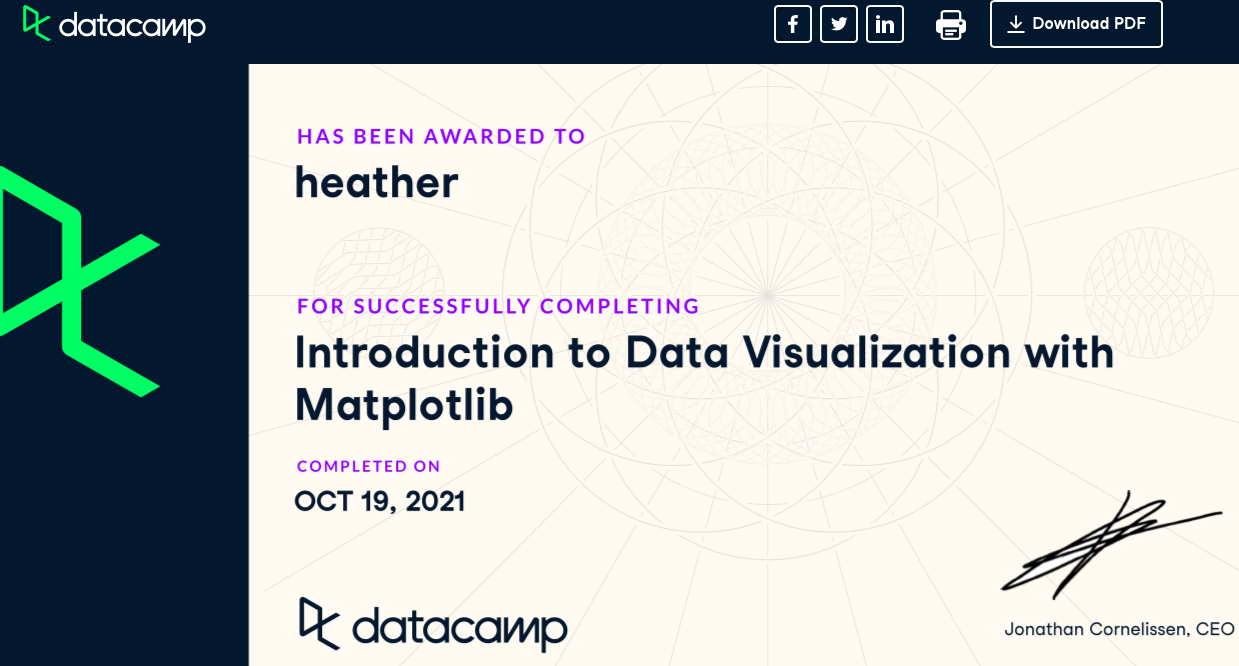

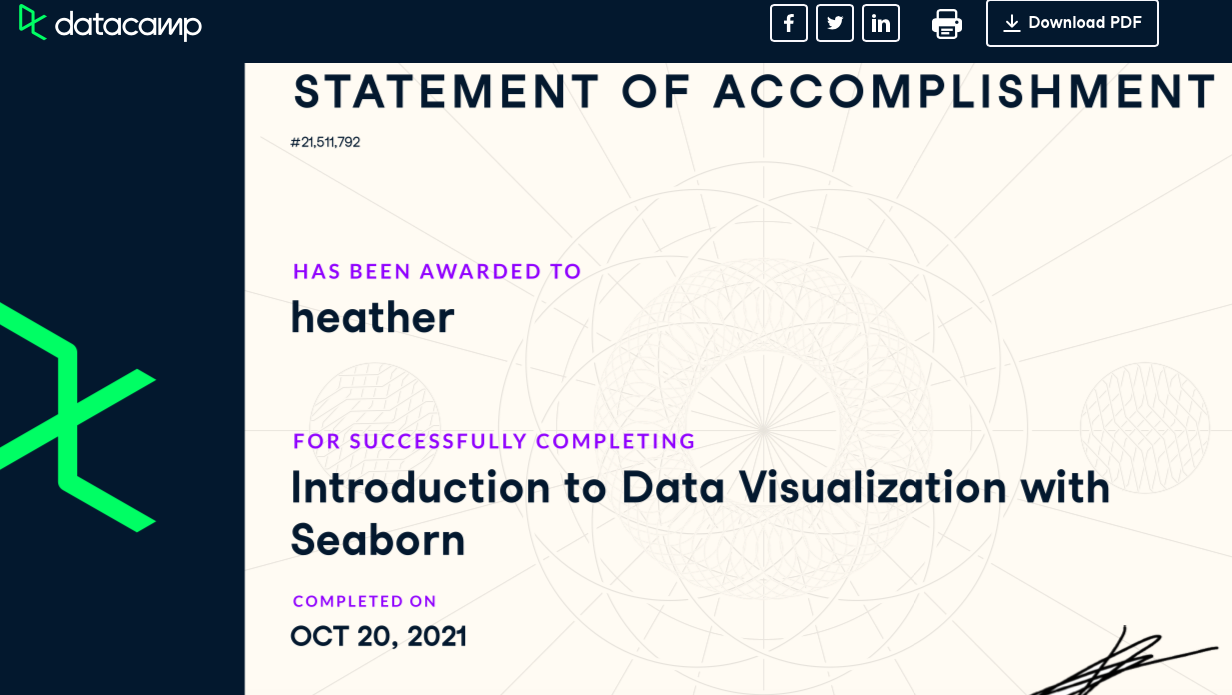